In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pl

# Version 0.4.9
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

# DE Testing

In [3]:
# Download the data
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE102nnn/GSE102569/suppl/GSE102569%5Fall%5FFPKM.txt.gz
!gunzip GSE102569_all_FPKM.txt.gz

--2024-06-12 10:32:47--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE102nnn/GSE102569/suppl/GSE102569%5Fall%5FFPKM.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 2607:f220:41e:250::7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473301 (462K) [application/x-gzip]
Saving to: ‘GSE102569_all_FPKM.txt.gz’

GSE102569_all_FPKM. 100%[===================>] 462.21K   969KB/s    in 0.5s    

2024-06-12 10:32:49 (969 KB/s) - ‘GSE102569_all_FPKM.txt.gz’ saved [473301/473301]



In [6]:
# Prepare the data
data = pd.read_csv('GSE102569_all_FPKM.txt', sep='\t', index_col=1)
assert 'CG9650' in data.index, 'Gene CG9650 not found in the data'
data.drop('gene_id', axis=1, inplace=True)
counts_df = data.T
metadata = pd.DataFrame(index=data.columns)
metadata['condition'] = metadata.index.str.split('_').str[0]

# Filter genes with low counts
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]

In [7]:
# Set up the pyDESeq2 object
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts_df.astype(int),
    metadata=metadata,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
)

In [8]:
# Run pyDESeq2
dds.deseq2()

Fitting size factors...
... done in 0.03 seconds.

Fitting dispersions...
... done in 6.48 seconds.

Fitting dispersion trend curve...
... done in 3.42 seconds.

Fitting MAP dispersions...
... done in 11.64 seconds.

Fitting LFCs...
... done in 5.85 seconds.

Replacing 0 outlier genes.



In [9]:
stat_res = DeseqStats(dds, inference=inference)

In [10]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition ScOE vs Ctrl
                    baseMean  log2FoldChange     lfcSE      stat  \
gene_short_name                                                    
a                   2.925245       -1.274322  0.915312 -1.392227   
Abl                 2.417753        0.247676  0.971115  0.255043   
abo                 6.896915       -0.448926  0.599719 -0.748561   
Acph-1             25.095476        0.559408  0.330849  1.690823   
Act5C            2870.438224       -0.747988  0.127443 -5.869204   
...                      ...             ...       ...       ...   
rump               91.931591        0.779846  0.198635  3.926026   
bl                 73.506158        0.423319  0.210207  2.013822   
rgr                20.661165       -0.436310  0.392564 -1.111436   
CR43174             2.621280       -1.031887  1.009347 -1.022331   
CG32138            29.173007       -1.342221  0.366523 -3.662043   

                       pvalue          padj  
gene_sho

... done in 1.75 seconds.



In [11]:
stat_res.lfc_shrink(coeff="condition_ScOE_vs_Ctrl")

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition ScOE vs Ctrl
                    baseMean  log2FoldChange     lfcSE      stat  \
gene_short_name                                                    
a                   2.925245       -0.408488  0.696151 -1.392227   
Abl                 2.417753        0.060599  0.640564  0.255043   
abo                 6.896915       -0.212421  0.495491 -0.748561   
Acph-1             25.095476        0.439094  0.321828  1.690823   
Act5C            2870.438224       -0.725587  0.127192 -5.869204   
...                      ...             ...       ...       ...   
rump               91.931591        0.728542  0.198445  3.926026   
bl                 73.506158        0.378020  0.207147  2.013822   
rgr                20.661165       -0.301691  0.364716 -1.111436   
CR43174             2.621280       -0.258831  0.660584 -1.022331   
CG32138            29.173007       -1.183654  0.369672 -3.662043   

                       pvalue          padj  
g

... done in 10.93 seconds.



In [12]:
res = stat_res.results_df

In [13]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_short_name,,,,,,
a,2.925245,-0.408488,0.696151,-1.392227,1.638538e-01,NaN
Abl,2.417753,0.060599,0.640564,0.255043,7.986899e-01,NaN
abo,6.896915,-0.212421,0.495491,-0.748561,4.541217e-01,6.963048e-01
Acph-1,25.095476,0.439094,0.321828,1.690823,9.087057e-02,2.552908e-01
Act5C,2870.438224,-0.725587,0.127192,-5.869204,4.378924e-09,1.433891e-07
...,...,...,...,...,...,...
rump,91.931591,0.728542,0.198445,3.926026,8.636074e-05,9.323737e-04
bl,73.506158,0.378020,0.207147,2.013822,4.402821e-02,1.508607e-01
rgr,20.661165,-0.301691,0.364716,-1.111436,2.663807e-01,5.162485e-01


In [14]:
res.loc['CG9650']

baseMean          7.841153
log2FoldChange    3.292896
lfcSE             0.903694
stat              3.897415
pvalue            0.000097
padj              0.001034
Name: CG9650, dtype: float64

In [16]:
res['score'] = -np.log10(res['pvalue'])
res.to_csv('pydeseq2_results.csv')

In [22]:
cph_expression = counts_df.loc[:, 'CG9650']
cph_expression.name = 'CG9650 expression'
cph_expression.to_csv('cph_expression.csv')

In [23]:
cph_expression

Ctrl_1     1.03973
Ctrl_2     1.02800
Ctrl_3     1.21887
ScOE_1    12.61720
ScOE_2    13.12310
ScOE_3     9.24930
ScOE_4    16.66960
Name: CG9650 expression, dtype: float64

# Plotting

In [24]:
# Set plotting style
from matplotlib import rcParams
# Type 2/TrueType fonts
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
# Arial font
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "sans-serif"

In [25]:
res = pd.read_csv('pydeseq2_results.csv', index_col=0)

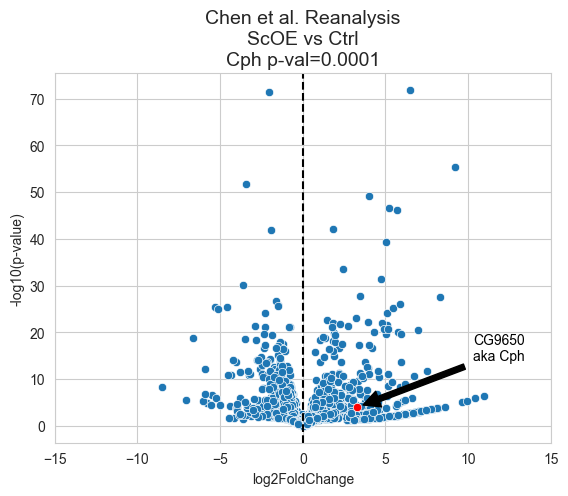

In [26]:
with sns.axes_style('whitegrid'):
    sns.scatterplot(data=res, y='score', x='log2FoldChange')
pv = np.round(res.loc['CG9650']['pvalue'], 5)
pl.title(f"Chen et al. Reanalysis\nScOE vs Ctrl\nCph p-val={pv}", fontdict=dict(fontsize=14))
pl.axvline(0, color='black', linestyle='--')
pl.xlim(-15, 15)
pl.ylabel('-log10(p-value)')
sns.scatterplot(data=res.loc[['CG9650']], y='score', x='log2FoldChange', ax=pl.gca(), color='red')
x,y = res.loc['CG9650'][['log2FoldChange', 'score']]
pl.annotate('CG9650\naka Cph', (x,y), xytext=(x+7, y+10), arrowprops=dict(facecolor='black', shrink=0.05))
pl.savefig('pydeseq2_volcano.pdf', bbox_inches='tight')
pl.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Ctrl vs. ScOE: adj. p-value=0.00103


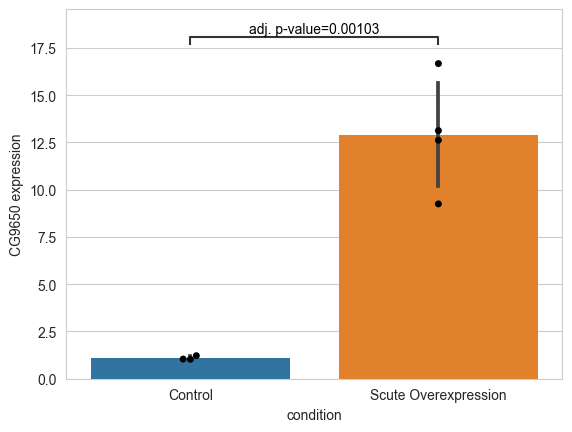

In [50]:
data = counts_df.reset_index()
data['condition'] = data['index'].str.split('_').str[0]

with sns.axes_style('whitegrid'):
    fig, ax = pl.subplots()
sns.barplot(data=data, x='condition', y='CG9650', ax=ax)
sns.swarmplot(data=data, x='condition', y='CG9650', color='black', ax=ax)

# padj = res.loc['CG9650']['padj']
# annotator = Annotator(data=data, x='condition', y='CG9650', ax=ax, pairs=[('Ctrl', 'ScOE')])
# annotator.set_custom_annotations(['adj. p-value=%.5f' % padj])
# annotator.annotate()

pl.xticks([0,1], labels=['Control', 'Scute Overexpression'])
pl.ylabel('CG9650 expression')
pl.savefig('pydeseq2_expression.pdf', bbox_inches='tight')
pl.show()